In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
########### State Space ##########

In [145]:
state_space = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        state_space[i][j] = i * 10 + j
state_space = np.transpose(state_space)

In [146]:
state_space

array([[ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.],
       [ 1., 11., 21., 31., 41., 51., 61., 71., 81., 91.],
       [ 2., 12., 22., 32., 42., 52., 62., 72., 82., 92.],
       [ 3., 13., 23., 33., 43., 53., 63., 73., 83., 93.],
       [ 4., 14., 24., 34., 44., 54., 64., 74., 84., 94.],
       [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
       [ 6., 16., 26., 36., 46., 56., 66., 76., 86., 96.],
       [ 7., 17., 27., 37., 47., 57., 67., 77., 87., 97.],
       [ 8., 18., 28., 38., 48., 58., 68., 78., 88., 98.],
       [ 9., 19., 29., 39., 49., 59., 69., 79., 89., 99.]])

In [147]:
w = 0.1

In [148]:
######### Reward functions ################

In [186]:
reward1 = np.zeros((10, 10))
reward1[9, 9] = 1.0

In [244]:
def print_values_in_table(values):
    g1 = np.round(values, decimals=3).reshape(10, 10)
    tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
    tb.set_fontsize(14)
    tb.scale(1.5, 1.5)
    tc = tb.properties()['child_artists']
    for cell in tc:
        cell.set_height(0.1)
        cell.set_width(0.1)
    
   
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])

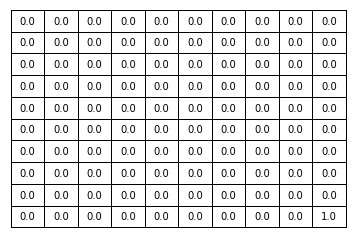

In [232]:
print_values_in_table(reward1)

In [189]:
reward2 = np.zeros((10, 10))

In [190]:
reward2[1:7, 4] = -100.0
reward2[1, 5] = -100.0
reward2[1:4, 6] = -100.0
reward2[7:9, 6] = -100.0
reward2[3, 7] = -100.0
reward2[7, 7] = -100.0
reward2[3:8, 8] = -100.0
reward2[9, 9] = 10.0

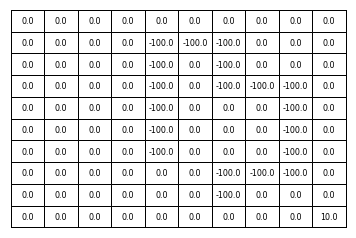

In [233]:
print_values_in_table(reward2)

In [152]:
def heat_maps(reward, i):
    plt.pcolor(reward)
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.title("Heat Map for Reward Function " + str(i))
    plt.show()

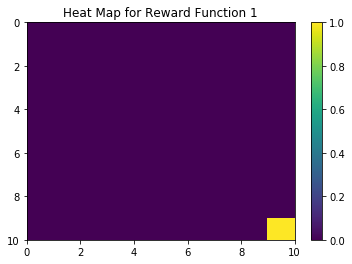

In [153]:
heat_maps(reward1, 1)

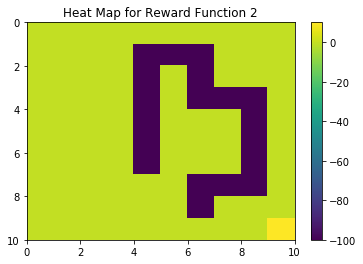

In [174]:
heat_maps(reward2, 2)

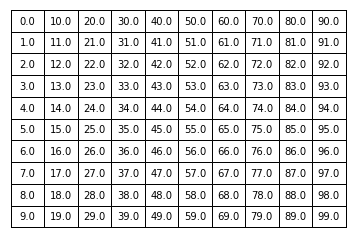

In [234]:
print_values_in_table(state_space)

In [200]:
epsilon = 0.01
gamma = 0.8

In [201]:
# Get the probability of transitioning from one state to another
def get_trans_prob(s1, s2, direction, w):
    
    l = s1 - 10
    u = s1 - 1
    r = s1 + 10
    d = s1 + 1

    if s2 == l:
        if direction == 0:
            return 1 - w + w / 4
        else:
            return w / 4
        
    elif s2 == u:
        if direction == 1:
            return 1 - w + w / 4
        else:
            return w / 4
        
    elif s2 == r:
        if direction == 2:
            return 1 - w + w / 4
        else:
            return w / 4
        
    elif s2 == d:
        if direction == 3:
            return 1 - w + w / 4
        else:
            return w / 4
        
    elif s2 == s1:
        prob = 0
        
        if l < 0:
            if direction == 0:
                prob += (1 - w + w / 4)
            else:
                prob += w / 4
                
        if r > 99:
            if direction == 2:
                prob += (1 - w + w / 4)
            else:
                prob += w / 4
                
        if u % 10 == 9:
            if direction == 1:
                prob += (1 - w + w / 4)
            else:
                prob += w / 4
                
        if d % 10 == 0:
            if direction == 3:
                prob += (1 - w + w / 4)
            else:
                prob += w / 4
                
        return prob
    
    else:
        return 0

In [202]:
#Get values for a given direction
def dir_val(s1, direction, w, gamma, reward, v):
    l = s1 - 10
    u = s1 - 1
    r = s1 + 10
    d = s1 + 1
    
    s2 = [l, r, u, d, s1]

    val = 0
    for s in s2:
        if s < 0 or s > 99 or (s1 % 10 == 0 and s % 10 == 9) or (s1 % 10 == 9 and s % 10 == 0):
            continue
        val += get_trans_prob(s1, s, direction, w) * (reward[s] + gamma * v[s])
    return val

In [203]:
def optimal_state_value(w, gamma, reward, epsilon):
    v = np.zeros((100))
    delta = np.inf
   
    while delta > epsilon:
        delta = 0
        v_dash = np.copy(v)
        for s in range(100):
            temp_v = v[s]
            l = dir_val(s, 0, w, gamma, reward, v_dash)
            u = dir_val(s, 1, w, gamma, reward, v_dash)
            r = dir_val(s, 2, w, gamma, reward, v_dash)
            d = dir_val(s, 3, w, gamma, reward, v_dash)
            
            v[s] = max(l, u, r, d)
            delta = max(delta, abs(temp_v - v[s]))
    return v

In [204]:
def optimal_state_policy(v, w, gamma, reward):
    p = np.zeros((100))
    for s in range(100):
        l = dir_val(s, 0, w, gamma, reward, v)
        u = dir_val(s, 1, w, gamma, reward, v)
        r = dir_val(s, 2, w, gamma, reward, v)
        d = dir_val(s, 3, w, gamma, reward, v)

        p[s] = np.argmax(np.array([l, u, r, d]))
    return p

In [238]:
v = optimal_state_value(w, gamma, reward1.transpose().flatten(), epsilon)

In [243]:
v

array([0.0442397 , 0.06457398, 0.09118409, 0.12504106, 0.16807826,
       0.22269335, 0.29198796, 0.37988042, 0.49134892, 0.61001145,
       0.06457398, 0.08833385, 0.12185345, 0.16476116, 0.21945345,
       0.28917752, 0.37804302, 0.49122817, 0.63338372, 0.78751905,
       0.09118409, 0.12185345, 0.16458987, 0.21930412, 0.28906986,
       0.3779887 , 0.49131731, 0.63565109, 0.81751608, 1.01875794,
       0.12504106, 0.16476116, 0.21930412, 0.28906536, 0.37798653,
       0.49132035, 0.63576137, 0.81977022, 1.05235181, 1.31521922,
       0.16807826, 0.21945345, 0.28906986, 0.37798653, 0.49132036,
       0.63576402, 0.81985582, 1.05442573, 1.35173221, 1.69523349,
       0.22269335, 0.28917752, 0.3779887 , 0.49132035, 0.63576402,
       0.81985701, 1.05448231, 1.35348475, 1.73334073, 2.18239181,
       0.29198796, 0.37804302, 0.49131731, 0.63576137, 0.81985582,
       1.05448231, 1.3535115 , 1.73462151, 2.21968743, 2.80696303,
       0.37988042, 0.49122817, 0.63565109, 0.81977022, 1.05442

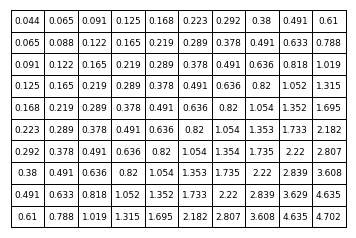

In [245]:
print_values_in_table(v)

In [246]:
p = optimal_state_policy(v, w, gamma, reward1.transpose().flatten())

Text(0.5, 1.0, 'Heat Map of Optimal State Values for Reward Function 1')

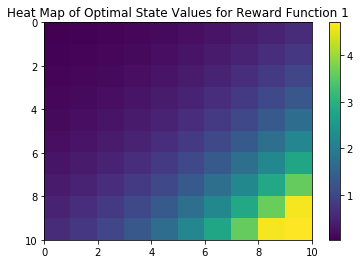

In [247]:
#Heat map of optimal state values
plt.figure()
plt.pcolor(v.reshape(10, 10))
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 1")

In [248]:
#Find optimal policy
def get_arrows(actions):
    arrows = ["" for x in range(100)]
    for i in range(100):
        if(actions[i]==0):
            arrows[i]=u'\u2190'
        elif(actions[i]==1):
            arrows[i]=u'\u2191'
        elif(actions[i]==2):
            arrows[i]=u'\u2192'
        elif(actions[i]==3):
            arrows[i]=u'\u2193'
    return arrows

In [249]:
p

array([3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 3., 3., 3., 3., 2.,
       2., 2., 2., 2., 2., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 2., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.])

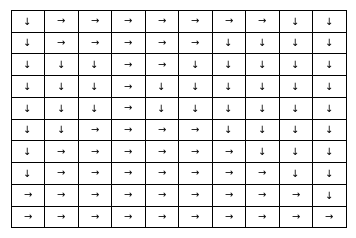

In [250]:
arrows = get_arrows(p)
#print(np.transpose(np.asarray(arrows).reshape((10, 10))))
pi1 = np.array(arrows).reshape(10, 10).transpose()
plt.figure()
tb = plt.table(cellText=pi1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [251]:
v = optimal_state_value(w, gamma, reward2.transpose().flatten(), epsilon)

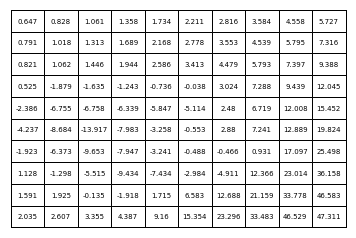

In [252]:
print_values_in_table(v)

In [253]:
p = optimal_state_policy(v, w, gamma, reward2.transpose().flatten())

Text(0.5, 1.0, 'Heat Map of Optimal State Values for Reward Function 2')

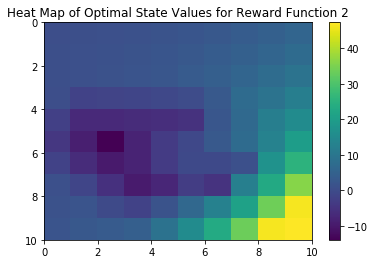

In [254]:
plt.figure()
plt.pcolor(v.reshape(10, 10))
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 2")

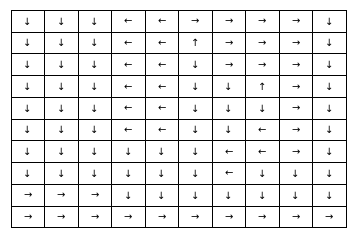

In [170]:
arrows = get_arrows(p)
#print(np.transpose(np.asarray(arrows).reshape((10, 10))))
pi1 = np.array(arrows).reshape(10, 10).transpose()
plt.figure()
tb = plt.table(cellText=pi1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()